In [1]:
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import cmocean

# Aesthetics
sns.set_theme()
sns.set_style('ticks')
sns.set_context('paper')
plt.rc('mathtext', fontset='stix')
plt.rc('font', family='serif')

In [2]:
simnames = ['RB', 'VC', 'P-RB', 'P-VC']

In [3]:
def y_colour(x):
    cmap = sns.color_palette('crest', as_cmap=True)
    return cmap(x*2)

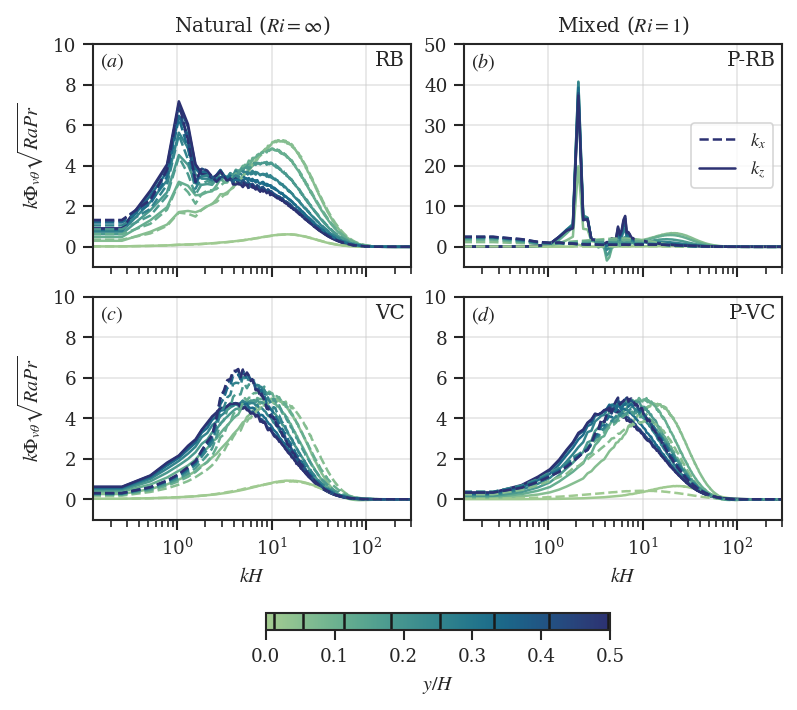

In [4]:
fig, axs = plt.subplots(2,2, layout='constrained', sharex=True, figsize=(5.2,4.6), dpi=150)

# Set dimensionless diffusivity (sqrt(Ra*Pr))
Peclet = np.sqrt(1e7)

with h5py.File('../data/spectra.h5','r') as f:
    for n, grp in enumerate(simnames):
        kx = f[grp+'/kx'][:]
        kz = f[grp+'/kz'][:]
        Ptx = f[grp+'/Phi_vT_kx'][()]
        Ptz = f[grp+'/Phi_vT_kz'][()]

        y = f[grp+'/y'][:]
        nyh = y.size//2
        # Set number of y-coordinates to plot
        nc = 8
        ixs = np.arange(1,nc+1)*nyh//nc - 1

        ax = axs[n % 2, n//2]
        for i in ixs:
            ax.semilogx(kx, kx*Ptx[:,i]/kz[1]*Peclet, '--', color=y_colour(y[i]), zorder=2.5)
            ax.plot(kz, kz*Ptz[:,i]/kz[1]*Peclet, color=y_colour(y[i]))

for ax in axs.flatten():
    ax.set_xlim([kz[1]/2, kz[-1]])

# Add legend
ax = axs[0,1]
ax.plot(1, 1, '--', color=y_colour(0.5), label='$k_x$')
ax.plot(1, 1, color=y_colour(0.5), label='$k_z$')
ax.legend(loc = 'center right')

# Add standalone colour bar
cmap = sns.color_palette('crest', as_cmap=True)
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 0.5), cmap=cmap),
             ax=axs, orientation='horizontal', label='$y/H$', shrink=0.5)
for i in ixs:
    cb.ax.axvline(y[i], c='k')

# Set limits and aesthetics
for ax in axs.flatten():
    ax.grid(True, alpha=0.5)
axs[0,0].set_ylim([-1,10])
axs[0,1].set_ylim([-5,50])
axs[1,0].set_ylim([-1,10])
axs[1,1].set_ylim([-1,10])
for ax in axs[1,:]:
    ax.set_xlabel('$kH$')
for ax in axs[:,0]:
    ax.set_ylabel('$k \\Phi_{v \\theta} \\sqrt{Ra Pr}$')
axs[0,0].set_title('Natural ($Ri=\\infty$)')
axs[0,1].set_title('Mixed ($Ri=1$)')

# Add axis labels
names = ['RB', 'P-RB','VC', 'P-VC']
lbls = ['$(a)$', '$(b)$', '$(c)$', '$(d)$']
for n, lbl in enumerate(lbls):
    axs[n//2,n%2].annotate(lbl, (0.02, 0.97), ha='left', va='top', xycoords='axes fraction')
    axs[n//2,n%2].annotate(names[n], (0.98, 0.97), ha='right', va='top', xycoords='axes fraction')

# fig.savefig('cospectra_1e7.pdf')

plt.show()